In [1]:
from audioop import cross

import pandas as pd
from pandas.core.common import random_state

from model.NCC_demo import y_predict

In [2]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [3]:
data = pd.DataFrame(dataset.data,columns = dataset.feature_names)

In [4]:
data.columns = [
    '住户收入的中位数', '房屋年龄的中位数', '平均房间数据', '平均卧室数目',
    '街区的人口', '平均入住率', '纬度', '经度'
]

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    dataset.target,
    test_size=0.3,
    random_state=1210
)

In [8]:
from sklearn.linear_model import LinearRegression as LR#LinearRegression


In [9]:
#建立模型
reg = LR(fit_intercept=True,#是否计算模型的截距
         copy_X=True,#程序复制x,防止X被覆盖
         n_jobs=-1,#所有内核参与运算
         positive = False#强制线性模型的系数为证
         )

In [10]:
reg.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [11]:
y_hat = reg.predict(X_test)

In [33]:
reg.coef_#返回前面每一个系数

array([ 4.28217281e-01,  9.91254367e-03, -9.71040803e-02,  5.78359909e-01,
       -3.17237397e-06, -3.22574961e-03, -4.24004392e-01, -4.36778327e-01])

In [37]:
[*zip(reg.feature_names_in_,reg.coef_)]

[('住户收入的中位数', 0.4282172805980205),
 ('房屋年龄的中位数', 0.009912543668054642),
 ('平均房间数据', -0.0971040803007032),
 ('平均卧室数目', 0.5783599085896157),
 ('街区的人口', -3.172373968561256e-06),
 ('平均入住率', -0.0032257496085364274),
 ('纬度', -0.42400439230970327),
 ('经度', -0.4367783265173471)]

In [41]:
reg.intercept_#返回截距

-37.081643840320766

In [38]:
reg.rank_

8

In [39]:
reg.singular_#返回特征矩阵的奇异值

array([1.27502384e+05, 1.50098485e+03, 1.42741409e+03, 3.46008532e+02,
       3.18768078e+02, 2.10151092e+02, 6.04977574e+01, 2.13823151e+01])

In [42]:
reg.n_features_in_#返回特征的数量

8

In [12]:
#求出均方方差
from sklearn.metrics import mean_squared_error as MSE#均方误差
MSE(y_hat,y_test)

0.5198138702278863

In [15]:
#将数据集划分为5份(cv=5)求出五个均方方差
from sklearn.model_selection import cross_val_score
cross_val_score(reg,X_train,y_train,cv=5,scoring='neg_mean_squared_error')

array([-0.56944385, -0.48865454, -0.53811748, -0.50304552, -0.55486849])

In [18]:
#
from sklearn.metrics import mean_absolute_error as MAE#平均绝对误差
MAE(y_hat,y_test)
cross_val_score(reg,X_train,y_train,cv=10,scoring='neg_mean_absolute_error')

array([-0.55657995, -0.55111683, -0.5125106 , -0.50478592, -0.52013679,
       -0.54715075, -0.52103139, -0.52199379, -0.53350441, -0.55897291])

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y_pred=y_hat,y_true=y_test)

0.6131935096962663

In [24]:
import matplotlib.pyplot as plt

In [22]:
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

In [23]:
y_test

array([0.965, 0.979, 1.229, ..., 0.945, 1.899, 1.334])

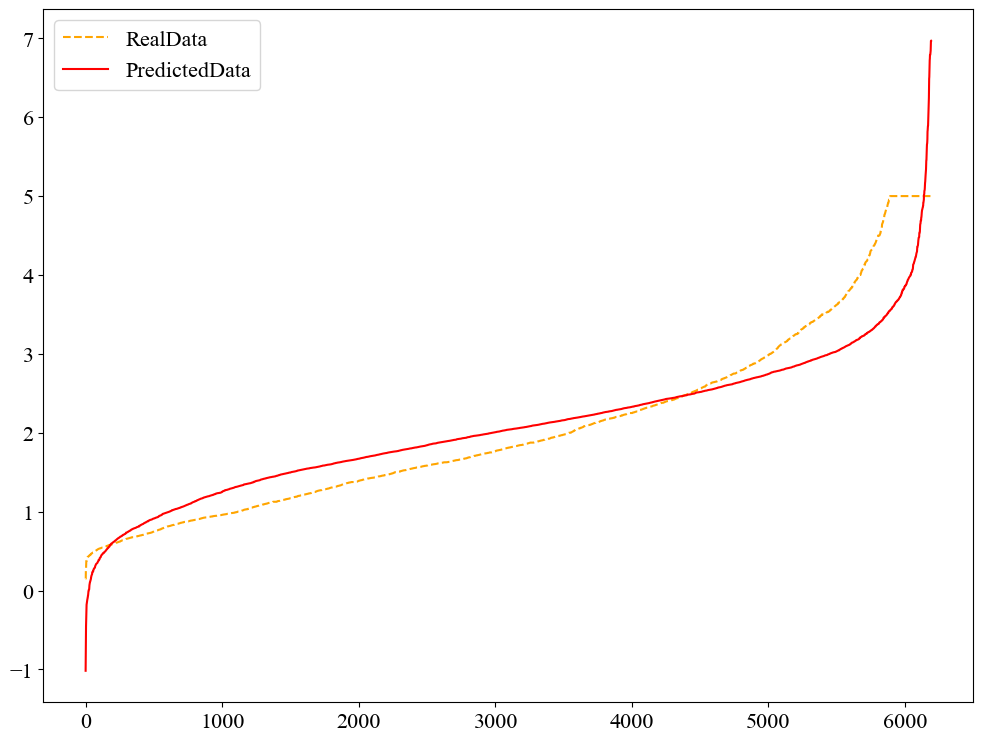

In [29]:
#绘制出实际数据的参数和预测数据的参数
plt.figure(figsize=(12,9))
plt.plot(range(len(y_test)),sorted(y_test),c = 'orange',ls = '--',label = 'RealData')
plt.plot(range(len(y_test)),sorted(y_hat),c='red',label = 'PredictedData')
plt.legend()
plt.show()

In [30]:
import numpy as np

In [31]:
rng = np.random.RandomState(1210)

In [36]:
X = rng.randn(100,8)
y = rng.randn(100,)

In [37]:
X

array([[ 1.08876142e-01,  1.46114950e+00, -1.18316851e+00,
        -3.71266889e-01,  4.70364163e-01, -7.97239461e-01,
        -1.88254249e-02,  1.15598856e+00],
       [ 1.64474797e+00,  9.80707051e-01,  1.29776352e-01,
        -7.01972889e-01,  2.98303049e-01, -1.90804284e+00,
         3.65720407e-01,  1.50610004e+00],
       [-6.67646845e-01, -5.91848367e-01, -1.02369023e+00,
         2.29483544e-01,  8.18025787e-01, -2.71108911e-01,
         1.17199215e-01,  7.19396636e-01],
       [ 1.21996433e+00, -1.81004046e+00, -5.86535330e-01,
        -2.93577714e-01, -4.02561411e-02,  4.30115156e-01,
        -9.96904585e-02, -4.41654133e-01],
       [-6.24636127e-01,  1.53290833e-01,  1.32644381e+00,
        -1.40672412e+00,  2.12826872e+00, -2.21594620e+00,
         3.34596047e-01, -2.67954115e+00],
       [ 9.31140488e-01,  1.24260305e+00,  1.80660971e+00,
        -8.25254837e-02,  4.92789102e-01,  3.16676675e-01,
         3.11576494e-01,  3.00915120e-01],
       [ 6.23080395e-02,  5.836044

In [39]:
cross_val_score(LR(),X,y,cv = 5)

array([-0.11979244, -0.35628323, -0.11987547,  0.07032536, -0.36232673])

In [35]:
dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])